# **Priliminary data analysis of Arena HUBs**

## Data are the logs from a remote Arena system, access control system that unlocks doors.

Initial files contain the following records:

*_id –  record ID*

*_uuid – device identifier, from hardware ( IMEI-like value)*

*_timestamp – event time (UTC)*

*rpc – the type of action/event (always “unlock” in the file)*

_ack_timestamp – acknowledgement time (when the system confirmed the event).
_ack_status – acknowledgement result (0 means success, empty means not acknowledged).*

Initial second dataset contain diagnostic telemetry and metadata: 
It’s recording resets, uptime, firmware versions, and network signal strength.

*_id – unique row identifier 
_uuid – device identifier 
timestamp – when the record was captured
just_booted – t means the device had just restarted when the log was recorded.
reset_reason – numeric code for why the device reset 
uptime – how many seconds the device had been running before the log.
fw_version – firmware version running on the device.
modem_fw_version – modem firmware version 
rsrp – signal strength (Reference Signal Received Power).
*


In [96]:
import pandas as pd


file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

#  rename 'date' → 'timestamp'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")


file_path = "Enhets data - SMRTEC huvudEntre - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

# Load your CSV
file_path = "Enhets data - Varbergs boxningsklubb - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'timestamp'})

# Save to new CSV
output_file = "Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

Saved as: Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv
Saved as: Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv
Saved as: Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv


In [97]:
import pandas as pd

# Load your CSV
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock.csv"
df = pd.read_csv(file_path)

# Merge date1 + time1 into datetime1
df['_timestamp'] = pd.to_datetime(
    df['date1'].astype(str) + " " + df['time1'].astype(str),
    errors='coerce'
)

# Merge date2 + time2 into datetime2
df['_ack_timestamp'] = pd.to_datetime(
    df['date2'].astype(str) + " " + df['time2'].astype(str),
    errors='coerce'
)

# Drop original date/time columns
df = df.drop(columns=['date1', 'time1', 'date2', 'time2'])

# Reorder columns
df = df[['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']]

# Save to new CSV
output_file = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

import pandas as pd

# Load your CSV
file_path = "Enhets data - SMRTEC huvudEntre - Unlock.csv"
df = pd.read_csv(file_path)

# Merge date1 + time1 into datetime1
df['_timestamp'] = pd.to_datetime(
    df['date1'].astype(str) + " " + df['time1'].astype(str),
    errors='coerce'
)

# Merge date2 + time2 into datetime2
df['_ack_timestamp'] = pd.to_datetime(
    df['date2'].astype(str) + " " + df['time2'].astype(str),
    errors='coerce'
)

# Drop original date/time columns
df = df.drop(columns=['date1', 'time1', 'date2', 'time2'])

# Reorder columns
df = df[['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']]

# Save to new CSV
output_file = "Enhets data - SMRTEC huvudEntre - Unlock_corr.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

Saved as: Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv
Saved as: Enhets data - SMRTEC huvudEntre - Unlock_corr.csv


In [98]:
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv"
df = pd.read_csv(file_path)

print(df.columns.tolist())

['  _id ', ' _uuid ', '_timestamp', 'rpc   ', '_ack_timestamp', '_ack_status']


In [99]:
import pandas as pd

# Load both CSVs
rsrp = pd.read_csv("Enhets data - Katarinasstädtjänst Enhet Grind - RSRP_corr.csv")
unlock = pd.read_csv("Enhets data - Katarinasstädtjänst Enhet Grind - Unlock_corr.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv", index=False)
df = pd.read_csv ("Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv")
df.head()
df.shape    

# Load both CSVs
rsrp = pd.read_csv("Enhets data - SMRTEC huvudEntre - RSRP.csv_corr.csv")
unlock = pd.read_csv("Enhets data - SMRTEC huvudEntre - Unlock_corr.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - SMRTEC huvudEntre_combined.csv", index=False)
   
# Load both CSVs
rsrp = pd.read_csv("Enhets data - Varbergs boxningsklubb - RSRP.csv_corr.csv")
unlock = pd.read_csv("Enhets data - Varbergs boxningsklubb - Unlock.csv")

# Combine them vertically
combined = pd.concat([rsrp, unlock], ignore_index=True)

# Save result
combined.to_csv("Enhets data - Varbergs boxningsklubb_combined.csv", index=False)
   
   

In [100]:
import pandas as pd
import os
from glob import glob

# Set input and output directories
input_folder = '3_enheterna_input_folder/'   # Replace with your folder path
output_folder = '3_enheterna_output_folder/'  # Folder to save updated CSVs

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all CSV files in the input folder
csv_files = glob(os.path.join(input_folder, '*.csv'))

# Process each file
for file_path in csv_files:
    try:
        # Read CSV
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        # Convert to datetime
        df['_timestamp'] = pd.to_datetime(df['_timestamp'], errors='coerce')
        df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'], errors='coerce')

        # Calculate response time
        df['response_time_seconds'] = (
            df['_ack_timestamp'] - df['_timestamp']
        ).dt.total_seconds()

        # Build output file path
        filename = os.path.basename(file_path)
        output_path = os.path.join(output_folder, filename)

        # Save to output file
        df.to_csv(output_path, index=False)

        print(f"Processed: {filename}")

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")


Processed: Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv
Processed: Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv
Processed: Enhets data - SMRTEC huvudEntre_combined.csv
Processed: Enhets data - Varbergs boxningsklubb_combined.csv


In [101]:
import pandas as pd

# Load the CSV file
input_file = '3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv'  # Replace with your actual file path
output_file = '3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv'  # Output file

# Read the CSV
df = pd.read_csv(input_file)

# Clean column names
df.columns = df.columns.str.strip()

# Convert timestamp columns to datetime
df['_timestamp'] = pd.to_datetime(df['_timestamp'], errors='coerce')
df['_ack_timestamp'] = pd.to_datetime(df['_ack_timestamp'], errors='coerce')

# Calculate response time in seconds
df['response_time_seconds'] = (
    df['_ack_timestamp'] - df['_timestamp']
).dt.total_seconds()

# Save to a new CSV file
df.to_csv(output_file, index=False)

print(f"Response time added. Saved to: {output_file}")


Response time added. Saved to: 3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined_with_response_time.csv


In [102]:
file_path = "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(1050, 14)

In [103]:
file_path = "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape 

['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(2687, 14)

In [104]:
file_path = "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.shape


['_id', '_uuid', 'timestamp', 'just_booted', 'reset_reason', 'uptime', 'fw_version', 'modem_fw_version', 'rsrp', '_timestamp', 'rpc', '_ack_timestamp', '_ack_status', 'response_time_seconds']


(1466, 14)


===== RESPONSE TIME SUMMARY SMRTEC=====


count    765.000000
mean       0.909926
std        1.923358
min        0.123102
25%        0.323860
50%        0.679821
75%        0.957693
max       44.291426
Name: response_time_seconds, dtype: float64


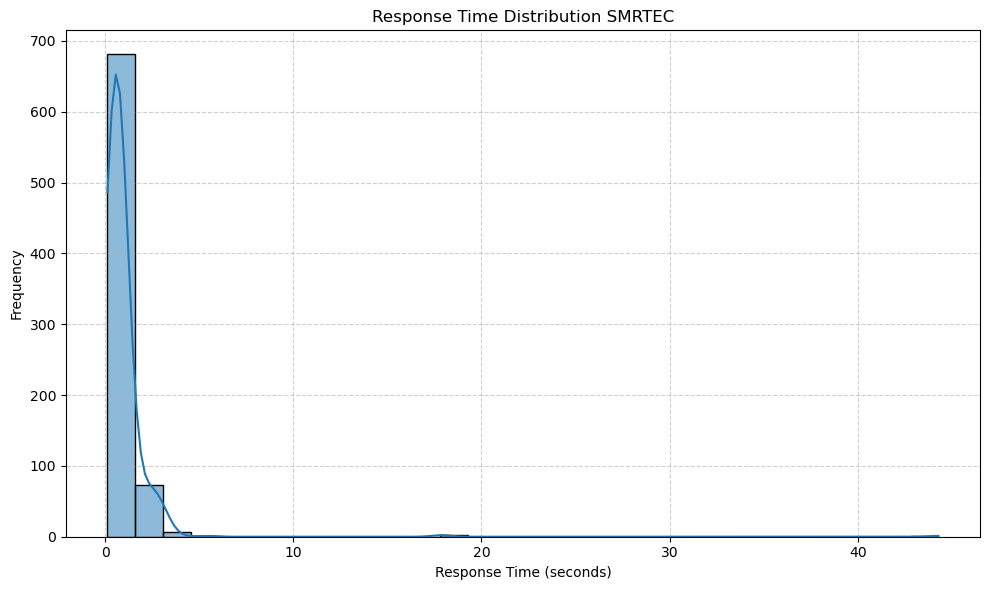

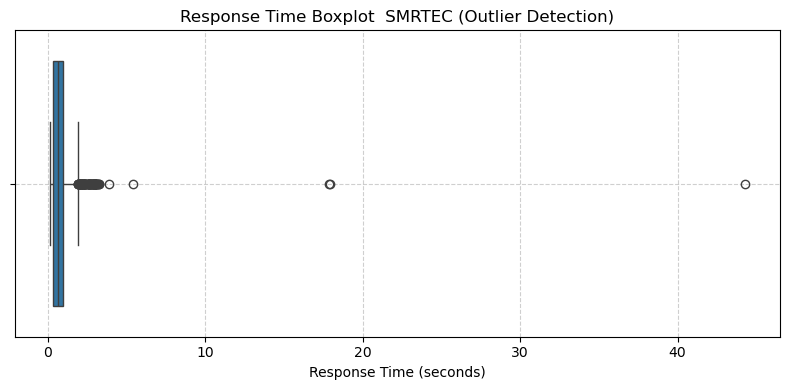

In [105]:
# ==============================================
#  Response Time Distribution Analysis SMRTEC
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)

# --- Data Cleaning ---
# Focus on RPC entries that have response times
df_rpcs = df[df['response_time_seconds'].notna()].copy()

# Convert response_time_seconds to numeric (if not already)
df_rpcs['response_time_seconds'] = pd.to_numeric(df_rpcs['response_time_seconds'], errors='coerce')

# Drop invalid or zero values
df_rpcs = df_rpcs[df_rpcs['response_time_seconds'] > 0]

# --- Summary Statistics ---
summary = df_rpcs['response_time_seconds'].describe()
print("\n===== RESPONSE TIME SUMMARY SMRTEC=====")
print(summary)

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df_rpcs['response_time_seconds'], bins=30, kde=True)
plt.title('Response Time Distribution SMRTEC')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Optional: Boxplot for Outliers ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rpcs['response_time_seconds'])
plt.title('Response Time Boxplot  SMRTEC (Outlier Detection)')
plt.xlabel('Response Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



===== RESPONSE TIME SUMMARY VARBERGS=====
count    268.000000
mean       1.425309
std        2.689544
min        0.103128
25%        0.295484
50%        0.807347
75%        1.375486
max       29.108349
Name: response_time_seconds, dtype: float64


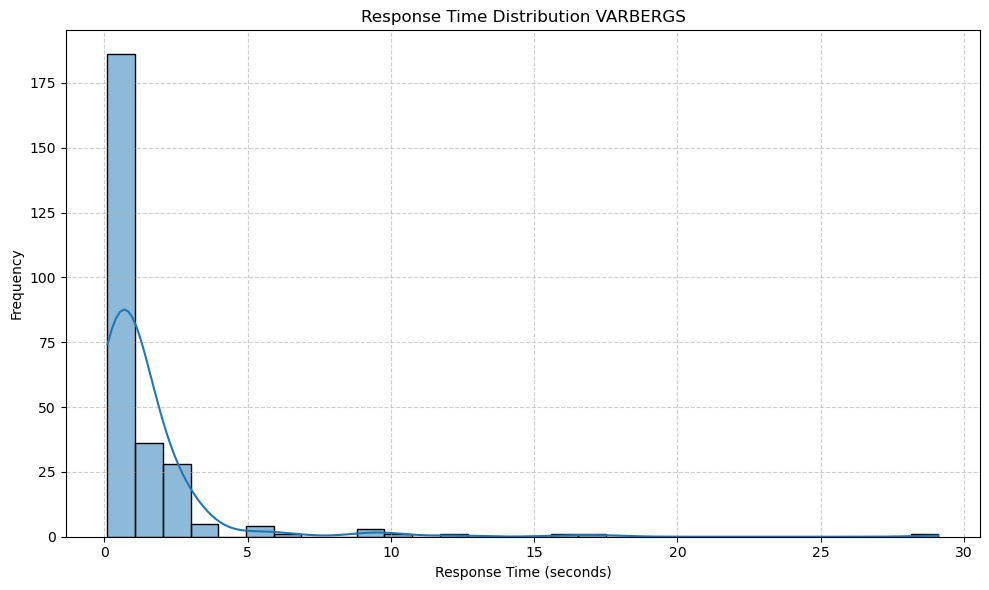

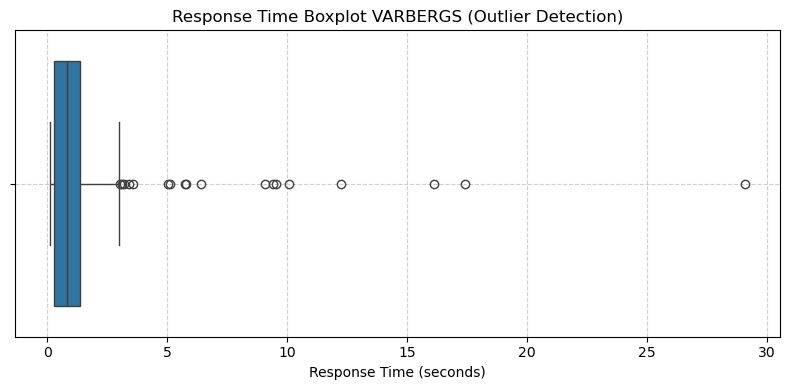

In [106]:
# ==============================================
#  Response Time Distribution Analysis VARBERGS
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv"  # adjust path if needed
df = pd.read_csv(file_path)

# --- Data Cleaning ---
# Focus on RPC entries that have response times
df_rpcs = df[df['response_time_seconds'].notna()].copy()

# Convert response_time_seconds to numeric (if not already)
df_rpcs['response_time_seconds'] = pd.to_numeric(df_rpcs['response_time_seconds'], errors='coerce')

# Drop invalid or zero values
df_rpcs = df_rpcs[df_rpcs['response_time_seconds'] > 0]

# --- Summary Statistics ---
summary = df_rpcs['response_time_seconds'].describe()
print("\n===== RESPONSE TIME SUMMARY VARBERGS=====")
print(summary)

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df_rpcs['response_time_seconds'], bins=30, kde=True)
plt.title('Response Time Distribution VARBERGS')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Optional: Boxplot for Outliers ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rpcs['response_time_seconds'])
plt.title('Response Time Boxplot VARBERGS (Outlier Detection)')
plt.xlabel('Response Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



===== RESPONSE TIME SUMMARY GRIND=====
count    1418.000000
mean        1.348012
std         2.762805
min         0.094093
25%         0.236282
50%         0.673706
75%         1.438208
max        44.304348
Name: response_time_seconds, dtype: float64


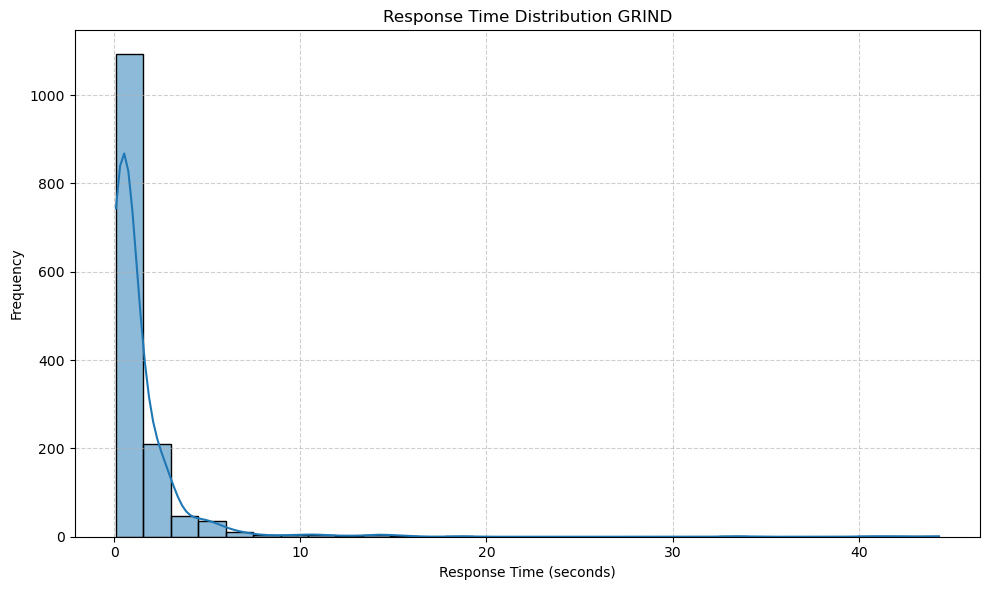

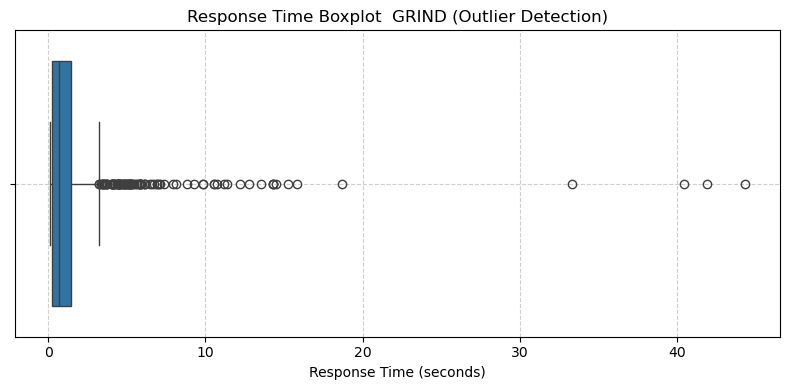

In [107]:
# ==============================================
#  Response Time Distribution Analysis GRIND
# ==============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
file_path = "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv"  
df = pd.read_csv(file_path)

# --- Data Cleaning ---
# Focus on RPC entries that have response times
df_rpcs = df[df['response_time_seconds'].notna()].copy()

# Convert response_time_seconds to numeric (if not already)
df_rpcs['response_time_seconds'] = pd.to_numeric(df_rpcs['response_time_seconds'], errors='coerce')

# Drop invalid or zero values
df_rpcs = df_rpcs[df_rpcs['response_time_seconds'] > 0]

# --- Summary Statistics ---
summary = df_rpcs['response_time_seconds'].describe()
print("\n===== RESPONSE TIME SUMMARY GRIND=====")
print(summary)

# --- Plot Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df_rpcs['response_time_seconds'], bins=30, kde=True)
plt.title('Response Time Distribution GRIND')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Optional: Boxplot for Outliers ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rpcs['response_time_seconds'])
plt.title('Response Time Boxplot  GRIND (Outlier Detection)')
plt.xlabel('Response Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

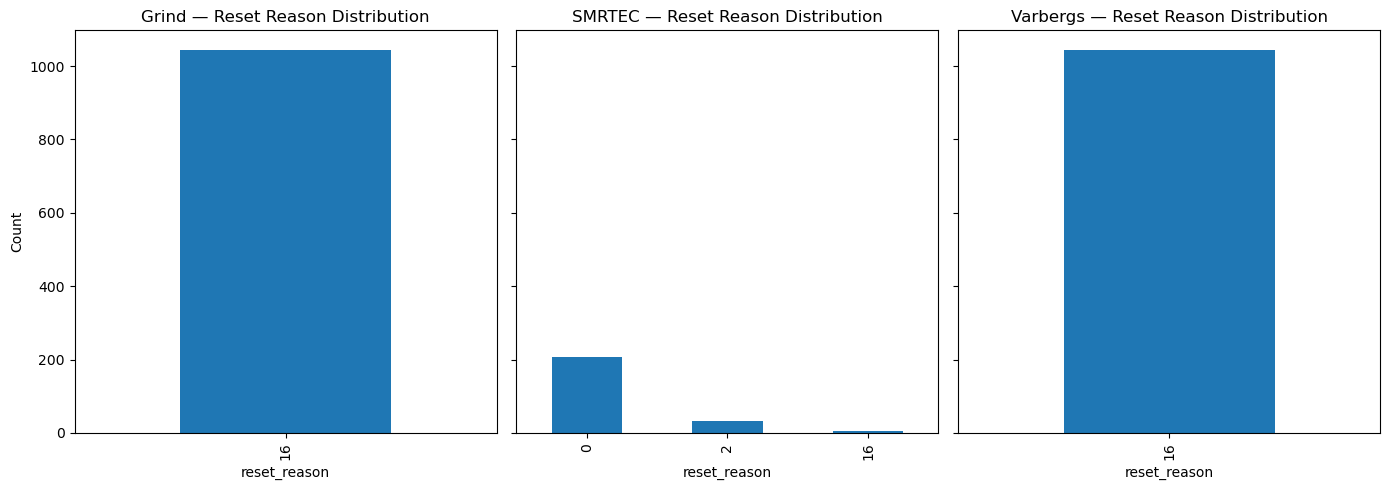

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# === File paths ===
files = {
    "Grind": "3_enheterna_output_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv",
    "SMRTEC": "3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv",
    "Varbergs": "3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv",
}

# === Load data ===
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# === Plot distributions from the fixed 'reset_reason' column ===
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for ax, (name, df) in zip(axes, dfs.items()):
    s = df["reset_reason"].dropna()

    # Try to display numeric codes cleanly; fall back to strings if needed
    try:
        s = s.astype(float).astype(int)
    except Exception:
        s = s.astype(str).str.strip()

    counts = s.value_counts().sort_index()
    counts.plot(kind="bar", ax=ax)

    ax.set_title(f"{name} — Reset Reason Distribution")
    ax.set_xlabel("reset_reason")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()




In [109]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv")

# Create or update the _ack_status column
df['_ack_status'] = df['_ack_timestamp'].apply(lambda x: 0 if pd.notna(x) and str(x).strip() != '' else None)

# Save the updated file
df.to_csv("3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv", index=False)

print("✅ Updated file saved as '")


✅ Updated file saved as '
